In [3]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers   import Input, Conv2D, MaxPool2D, Dense  
from tensorflow.keras.layers   import BatchNormalization, Dropout, Flatten
from tensorflow.keras.optimizers import RMSprop
import numpy as np
import matplotlib.pyplot as plt

#1: 
##gpus = tf.config.experimental.list_physical_devices('GPU')
##tf.config.experimental.set_memory_growth(gpus[0], True)

#2
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32')
x_test  = x_test.astype('float32')
x_train /= 255.0 # [0.0, 1.0]
x_test  /= 255.0

# expand data with channel = 1
x_train = np.expand_dims(x_train,axis=3) # (60000, 28, 28, 1)
x_test  = np.expand_dims(x_test, axis=3) # (10000, 28, 28, 1)

# one-hot encoding 
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)


1875/1875 - 16s - loss: 0.2793 - accuracy: 0.9014 - 16s/epoch - 8ms/step
313/313 - 3s - loss: 0.3413 - accuracy: 0.8835 - 3s/epoch - 8ms/step


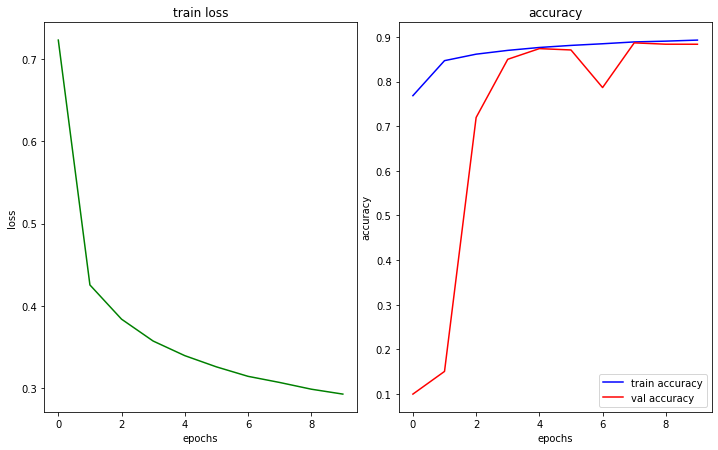

In [6]:
#3: build a sequential model
model = tf.keras.Sequential()
model.add(Input(x_train.shape[1:])) # shape=(28, 28, 1)
model.add(Conv2D(filters=16, kernel_size = (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D())

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D())
model.add(Dropout( rate=0.2))

model.add(Flatten())
model.add(Dense(units=10, activation='softmax'))
##model.summary()

#4: train and evaluate the model
opt = RMSprop(learning_rate=0.01)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
ret = model.fit(x_train, y_train, epochs=10, batch_size=400, 
                validation_data = (x_test, y_test), verbose=0)

train_loss, train_acc = model.evaluate(x_train, y_train, verbose=2)
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

#5: plot accuracy and loss
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
fig.tight_layout()
ax[0].plot(ret.history['loss'],  "g-")
ax[0].set_title("train loss")
ax[0].set_xlabel('epochs')
ax[0].set_ylabel('loss')

ax[1].plot(ret.history['accuracy'],     "b-", label="train accuracy")
ax[1].plot(ret.history['val_accuracy'], "r-", label="val accuracy")
ax[1].set_title("accuracy")
ax[1].set_xlabel('epochs')
ax[1].set_ylabel('accuracy')
plt.legend(loc="best")
plt.show()

1875/1875 - 16s - loss: 0.3056 - accuracy: 0.8946 - 16s/epoch - 9ms/step
313/313 - 3s - loss: 0.3499 - accuracy: 0.8787 - 3s/epoch - 9ms/step


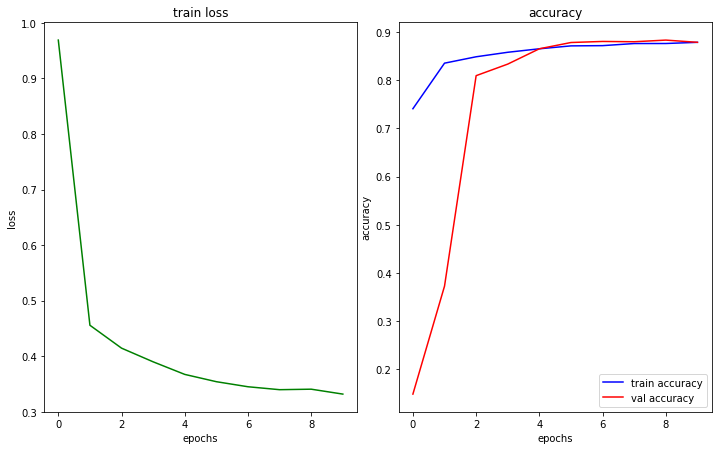

In [7]:
#3: build a sequential model
model = tf.keras.Sequential()
model.add(Input(x_train.shape[1:])) # shape=(28, 28, 1)
model.add(Conv2D(filters=16, kernel_size = (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D())

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(Dropout( rate=0.5))
model.add(MaxPool2D())

model.add(Flatten())
model.add(Dense(units=10, activation='softmax'))
##model.summary()

#4: train and evaluate the model
opt = RMSprop(learning_rate=0.01)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
ret = model.fit(x_train, y_train, epochs=10, batch_size=400, 
                validation_data = (x_test, y_test), verbose=0)

train_loss, train_acc = model.evaluate(x_train, y_train, verbose=2)
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

#5: plot accuracy and loss
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
fig.tight_layout()
ax[0].plot(ret.history['loss'],  "g-")
ax[0].set_title("train loss")
ax[0].set_xlabel('epochs')
ax[0].set_ylabel('loss')

ax[1].plot(ret.history['accuracy'],     "b-", label="train accuracy")
ax[1].plot(ret.history['val_accuracy'], "r-", label="val accuracy")
ax[1].set_title("accuracy")
ax[1].set_xlabel('epochs')
ax[1].set_ylabel('accuracy')
plt.legend(loc="best")
plt.show()

1875/1875 - 16s - loss: 0.2336 - accuracy: 0.9135 - 16s/epoch - 9ms/step
313/313 - 3s - loss: 0.3175 - accuracy: 0.8890 - 3s/epoch - 9ms/step


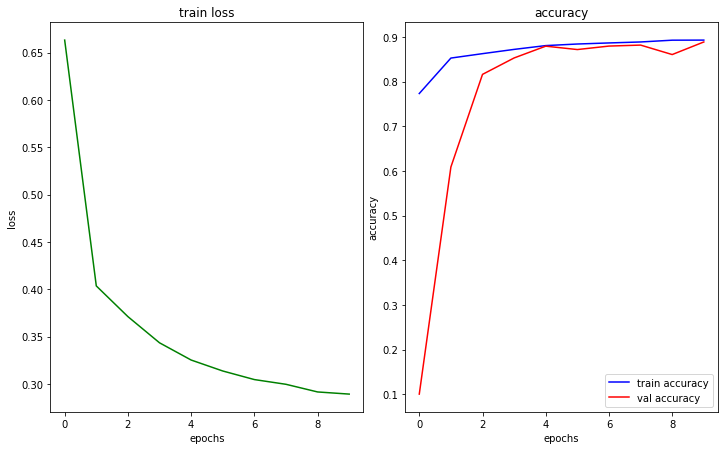

In [5]:
#3: build a sequential model - 정규화 삭제
model = tf.keras.Sequential()
model.add(Input(x_train.shape[1:])) # shape=(28, 28, 1)
model.add(Conv2D(filters=16, kernel_size = (3,3), activation='relu'))
model.add(MaxPool2D())

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D())

model.add(Flatten())
model.add(Dense(units=10, activation='softmax'))
##model.summary()

#4: train and evaluate the model
opt = RMSprop(learning_rate=0.01)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
ret = model.fit(x_train, y_train, epochs=10, batch_size=400, 
                validation_data = (x_test, y_test), verbose=0)

train_loss, train_acc = model.evaluate(x_train, y_train, verbose=2)
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

#5: plot accuracy and loss
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
fig.tight_layout()
ax[0].plot(ret.history['loss'],  "g-")
ax[0].set_title("train loss")
ax[0].set_xlabel('epochs')
ax[0].set_ylabel('loss')

ax[1].plot(ret.history['accuracy'],     "b-", label="train accuracy")
ax[1].plot(ret.history['val_accuracy'], "r-", label="val accuracy")
ax[1].set_title("accuracy")
ax[1].set_xlabel('epochs')
ax[1].set_ylabel('accuracy')
plt.legend(loc="best")
plt.show()

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.layers   import Input, Conv2D, MaxPool2D, Dense  
from tensorflow.keras.layers   import BatchNormalization, Dropout, Flatten
from tensorflow.keras.optimizers import RMSprop
import numpy as np
import matplotlib.pyplot as plt

#1: 
##gpus = tf.config.experimental.list_physical_devices('GPU')
##tf.config.experimental.set_memory_growth(gpus[0], True)

#2
(x_train, y_train), (x_test, y_test) = cifar100.load_data() # 'fine'
x_train = x_train.astype('float32') # (50000, 32, 32, 3)
x_test  = x_test.astype('float32')  # (10000, 32, 32, 3)

# one-hot encoding 
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

#3:
def normalize_image(image): # 3-channel
    mean=  np.mean(image, axis = (0, 1, 2))
    std =  np.std(image, axis = (0, 1, 2))
    image = (image-mean)/std
    return image
x_train= normalize_image(x_train) # range: N(mean,std]
x_test = normalize_image(x_test)


169001437/169001437 [==============================] - 153s 1us/step


In [9]:

#4: build a model
model = tf.keras.Sequential()
model.add(Input(shape=x_train.shape[1:])) #  shape=(32, 32, 3)

model.add(Conv2D(filters=16, kernel_size = (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D())

model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu')) 
model.add(BatchNormalization())
model.add(MaxPool2D())
model.add(Dropout(rate=0.25))

model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D())
model.add(Dropout(rate=0.5))

model.add(Flatten())
model.add(Dense(units=100, activation='softmax')) # 100 classes 
model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 32, 32, 16)        448       
                                                                 
 batch_normalization_7 (Batc  (None, 32, 32, 16)       64        
 hNormalization)                                                 
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 16, 16, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 16, 16, 32)        4640      
                                                                 
 batch_normalization_8 (Batc  (None, 16, 16, 32)       128       
 hNormalization)                                                 
                                                      

1563/1563 - 26s - loss: 2.1609 - accuracy: 0.4523 - 26s/epoch - 17ms/step
313/313 - 5s - loss: 2.4140 - accuracy: 0.3933 - 5s/epoch - 17ms/step


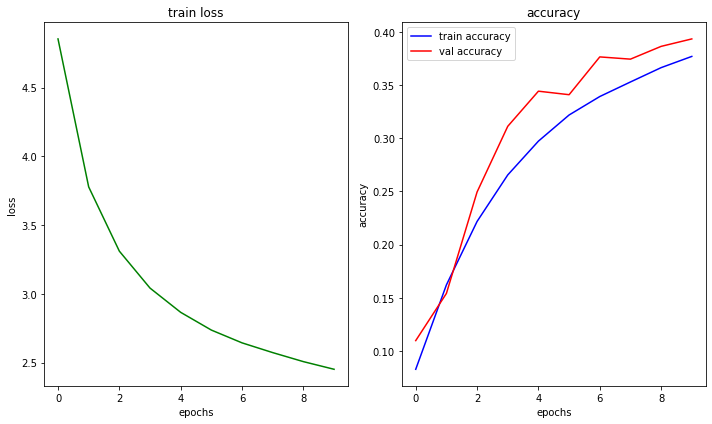

In [10]:
#5: train and evaluate the model
opt = RMSprop(learning_rate=0.001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
ret = model.fit(x_train, y_train, epochs=10, batch_size=400,
                validation_data = (x_test, y_test), verbose=0)
train_loss, train_acc = model.evaluate(x_train, y_train, verbose=2)
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

#6: plot accuracy and loss
fig, ax = plt.subplots(1, 2, figsize=(10,6))
ax[0].plot(ret.history['loss'],  "g-") #, label="train loss")
ax[0].set_title("train loss")
ax[0].set_xlabel('epochs')
ax[0].set_ylabel('loss')

ax[1].plot(ret.history['accuracy'],     "b-", label="train accuracy")
ax[1].plot(ret.history['val_accuracy'], "r-", label="val accuracy")
ax[1].set_title("accuracy")
ax[1].set_xlabel('epochs')
ax[1].set_ylabel('accuracy')
plt.legend(loc="best")
fig.tight_layout()
plt.show()
